# ANÁLISIS DESCRIPTIVO GENERAL

### Importación de librerías y apertura de Dataframe

In [37]:
# Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reset rc params to defaults
sns.reset_orig()

In [38]:
import statsmodels.stats.api as sms # Para la regresión y validación de supuestos ejecutamos el statsmodels
import statsmodels.api as sm # Submódulo de statsmodels que son las estadisticas "stats"
from statsmodels.formula.api import ols # La fórmula api de statsmodel permite seguir la notación antes revisada
from statsmodels.compat import lzip # Módulo para las pruebas de hipótesis.

In [39]:
# Importamos un archivo csv a un DataFrame en pandas
df = pd.read_csv('BDTICMODEL.csv', encoding='ISO-8859-1')
df

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_1,tic2_2_1a,tic2_2_1b,tic2_2_1c,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,Año,Total_Personal,Total_Espec
0,2,3481,0,3481,0,0,1,2,2,1,...,2,2,2,2,2,2,1,2016,2,0
1,0,1200,600,360,240,0,1,1,2,2,...,2,2,1,2,2,2,1,2016,2,0
2,2,4761,4761,0,0,0,1,2,2,1,...,1,1,1,2,2,2,1,2016,8,0
3,2,31598,31598,0,0,0,1,2,1,2,...,2,1,2,2,2,2,1,2016,1,0
4,1,101277,101277,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2016,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,33388,0,33388,0,0,1,2,2,1,...,1,1,1,2,2,1,2,2021,3,0
14025,0,26819,16359,10459,0,0,1,2,2,1,...,2,1,1,1,2,2,1,2021,21,1
14026,1,10506,10506,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2021,60,0
14027,0,2182,196,1985,0,0,1,2,2,1,...,2,1,2,2,2,1,2,2021,22,0


### Análisis de valores perdidos, nulos, etc

In [40]:
df.isnull().sum()

des_tamano        0
tic1_2            0
tic1_3a           0
tic1_3b           0
tic1_3c           0
tic1_3d           0
tic2_1            0
tic2_2_1a         0
tic2_2_1b         0
tic2_2_1c         0
tic2_3            0
tic2_6a           0
tic2_6b           0
tic2_6c           0
tic2_6d           0
tic2_6f           0
tic2_6g           0
tic2_6h           0
tic2_6i           0
tic2_6k           0
tic2_8            0
tic2_8_2b         0
tic2_8_2c         0
tic3_1            0
tic3_1_2b         0
tic3_1_2c         0
tic3_1_2d         0
tic3_1_2e         0
tic3_1_2f         0
tic3_2            0
tic4_1a           0
tic4_1b           0
tic4_1d           0
tic4_1e           0
tic4_2a           0
tic4_2b           0
tic4_2c           0
tic4_2d           0
tic4_2e           0
tic4_4a           0
tic4_4b           0
tic4_4c           0
tic4_4d           0
tic4_4e           0
tic4_4f           0
tic4_4g           0
tic4_4h           0
tic5_1a           0
tic5_1b           0
tic5_1d           0


In [41]:
# Eliminamos la variable tic2_1 ya que solo contiene un valor único que es "1"

df = df.drop('tic2_1', axis=1)

In [42]:
df

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,Año,Total_Personal,Total_Espec
0,2,3481,0,3481,0,0,2,2,1,1,...,2,2,2,2,2,2,1,2016,2,0
1,0,1200,600,360,240,0,1,2,2,2,...,2,2,1,2,2,2,1,2016,2,0
2,2,4761,4761,0,0,0,2,2,1,2,...,1,1,1,2,2,2,1,2016,8,0
3,2,31598,31598,0,0,0,2,1,2,2,...,2,1,2,2,2,2,1,2016,1,0
4,1,101277,101277,0,0,0,2,2,1,2,...,2,1,2,2,2,2,1,2016,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,33388,0,33388,0,0,2,2,1,1,...,1,1,1,2,2,1,2,2021,3,0
14025,0,26819,16359,10459,0,0,2,2,1,1,...,2,1,1,1,2,2,1,2021,21,1
14026,1,10506,10506,0,0,0,2,2,1,2,...,2,1,2,2,2,2,1,2021,60,0
14027,0,2182,196,1985,0,0,2,2,1,1,...,2,1,2,2,2,1,2,2021,22,0


### Limpieza de valores perdidos, nulos, etc

### Identificación  del tipo de Datos

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   des_tamano      14029 non-null  int64
 1   tic1_2          14029 non-null  int64
 2   tic1_3a         14029 non-null  int64
 3   tic1_3b         14029 non-null  int64
 4   tic1_3c         14029 non-null  int64
 5   tic1_3d         14029 non-null  int64
 6   tic2_2_1a       14029 non-null  int64
 7   tic2_2_1b       14029 non-null  int64
 8   tic2_2_1c       14029 non-null  int64
 9   tic2_3          14029 non-null  int64
 10  tic2_6a         14029 non-null  int64
 11  tic2_6b         14029 non-null  int64
 12  tic2_6c         14029 non-null  int64
 13  tic2_6d         14029 non-null  int64
 14  tic2_6f         14029 non-null  int64
 15  tic2_6g         14029 non-null  int64
 16  tic2_6h         14029 non-null  int64
 17  tic2_6i         14029 non-null  int64
 18  tic2_6k         14029 non-

### Identificación de valores únicos

In [44]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos para la columna '{column}':")
    print(unique_values)
    print()  # Línea en blanco para separar los resultados de cada columna

Valores únicos para la columna 'des_tamano':
[2 0 1]

Valores únicos para la columna 'tic1_2':
[ 3481  1200  4761 ... 33388 10506  2182]

Valores únicos para la columna 'tic1_3a':
[    0   600  4761 ...  1931 16359 10506]

Valores únicos para la columna 'tic1_3b':
[ 3481   360     0 ... 33388 10459  1985]

Valores únicos para la columna 'tic1_3c':
[    0   240   177 ...  9980  9280 17838]

Valores únicos para la columna 'tic1_3d':
[    0  2532   858 ... 14504 42277  2361]

Valores únicos para la columna 'tic2_2_1a':
[2 1]

Valores únicos para la columna 'tic2_2_1b':
[2 1]

Valores únicos para la columna 'tic2_2_1c':
[1 2]

Valores únicos para la columna 'tic2_3':
[1 2]

Valores únicos para la columna 'tic2_6a':
[1 2]

Valores únicos para la columna 'tic2_6b':
[1 2]

Valores únicos para la columna 'tic2_6c':
[2 1]

Valores únicos para la columna 'tic2_6d':
[2 1]

Valores únicos para la columna 'tic2_6f':
[2 1]

Valores únicos para la columna 'tic2_6g':
[2 1]

Valores únicos para la colu

### Resumen estadístico

In [45]:
df.describe()

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,Año,Total_Personal,Total_Espec
count,14029.000000,1.402900e+04,1.402900e+04,1.402900e+04,1.402900e+04,1.402900e+04,14029.000000,14029.000000,14029.000000,14029.000000,...,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000
mean,0.254045,2.874401e+05,9.553790e+04,1.148728e+05,1.383361e+04,6.319547e+04,1.870269,1.869698,1.101290,1.398674,...,1.694419,1.310856,1.488559,1.429610,1.760425,1.791218,1.427757,2018.415283,252.475658,4.715233
std,0.546823,4.469226e+06,1.221233e+06,3.147217e+06,1.439858e+05,2.186517e+06,0.336020,0.336647,0.301723,0.489643,...,0.460670,0.462861,0.499887,0.495038,0.426839,0.406453,0.494771,1.677153,611.648955,47.432295
min,0.000000,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,0.000000,0.000000
25%,0.000000,4.143000e+03,2.200000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2017.000000,42.000000,0.000000
50%,0.000000,1.516300e+04,8.298000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2018.000000,92.000000,1.000000
75%,0.000000,6.401600e+04,3.036800e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2020.000000,223.000000,3.000000
max,2.000000,3.202191e+08,7.905671e+07,3.170170e+08,6.683836e+06,2.419123e+08,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2021.000000,10634.000000,3509.000000


In [46]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [47]:
l_reg = LinearRegression().fit(X, y)

In [48]:
l_reg.coef_

array([-4.55444080e-02,  4.55444162e-02,  4.55444089e-02,  4.55444205e-02,
        4.55444076e-02,  1.20274178e-02, -7.09217764e-02,  5.04446420e-02,
        3.15369263e-02, -1.15978742e-01,  5.42650232e-02, -9.54204011e-04,
       -2.00003095e-03,  9.10759334e-02,  1.11574155e-02, -5.60432843e-02,
       -4.97295529e-02,  5.24958933e-03, -1.12210683e-04,  1.57158934e-02,
       -2.39374640e-02,  2.43458822e-02,  9.97495372e-03,  2.26316361e-02,
        2.72721544e-02, -2.22135987e-02,  3.93600735e-02, -1.07252625e-02,
        2.43670304e-05, -1.72537348e-04, -2.17945033e-04, -2.74597092e-04,
        4.58618823e-02, -3.81772540e-02, -3.56644564e-02,  1.30717351e-03,
        2.83218341e-02, -3.39002798e-02,  8.03772475e-02,  1.27567834e-01,
       -7.53628540e-02,  6.58322038e-04,  5.55394060e-02,  3.52208026e-02,
       -6.25757846e-02, -1.89739222e-02,  5.44227380e-02,  1.63345153e-02,
       -4.33429427e-02,  3.83178451e-02,  7.89381534e-02, -4.55921236e-03,
       -2.40757827e-02, -

In [49]:
# MSE: mean squared error, MAE: mean absoulte error, RMSE: Root mean square error
y_model = l_reg.predict(X)

((y - y_model)**2).mean(), (np.abs(y - y_model)).mean(), np.sqrt(((y - y_model)**2).mean())

(0.2725694914257177, 0.3781831120621993, 0.5220818819167331)

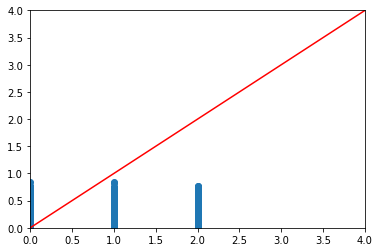

In [53]:
plt.scatter(y, y_model)
plt.xlim(0,4)
plt.ylim(0,4)
plt.plot([0,4], [0,4], 'r')

### Distribución de nuestra variable objetivo

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tic1_2', ylabel='Density'>

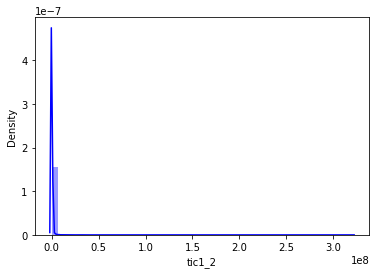

In [10]:
sns.distplot(df['tic1_2'],color="blue")

In [11]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.tic1_2.quantile(0.25)
Q3 = df.tic1_2.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

59873.0


In [12]:
df.shape

(14029, 58)

In [13]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['tic1_2'] < (Q1 - 1.5 * IQR)) |(df['tic1_2'] > (Q3 + 1.5 * IQR)))]
df.shape

(12032, 58)

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tic1_2', ylabel='Density'>

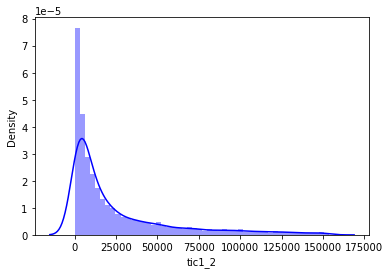

In [14]:
sns.distplot(df['tic1_2'],color="blue")

In [15]:
df.corr().style.background_gradient(cmap='coolwarm')

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,tic2_6g,tic2_6h,tic2_6i,tic2_6k,tic2_8,tic2_8_2b,tic2_8_2c,tic3_1,tic3_1_2b,tic3_1_2c,tic3_1_2d,tic3_1_2e,tic3_1_2f,tic3_2,tic4_1a,tic4_1b,tic4_1d,tic4_1e,tic4_2a,tic4_2b,tic4_2c,tic4_2d,tic4_2e,tic4_4a,tic4_4b,tic4_4c,tic4_4d,tic4_4e,tic4_4f,tic4_4g,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,Año,Total_Personal,Total_Espec
des_tamano,1.000000,-0.197824,-0.171971,-0.063366,-0.058489,-0.068286,-0.018154,-0.071846,0.072406,0.054999,-0.009598,0.065477,0.027115,0.023991,0.050069,0.034035,-0.019463,-0.025122,0.019629,0.034255,0.011286,0.004896,0.026278,0.031481,0.032856,0.032292,0.013647,0.037276,0.024037,-0.100478,-0.102495,-0.103006,-0.059510,0.076038,-0.018203,-0.023348,0.052778,0.061353,0.034425,0.130108,0.150745,0.053681,0.069362,0.104656,0.082432,0.013814,0.015712,0.044294,0.039166,0.000005,0.056591,0.117537,0.073848,0.030006,-0.064147,0.006648,-0.176061,-0.037588
tic1_2,-0.197824,1.000000,0.741947,0.433492,0.318892,0.444285,0.028073,0.076884,-0.125388,-0.091571,-0.004128,-0.126646,-0.127921,-0.053672,-0.054628,-0.068231,-0.072797,-0.075217,-0.151749,-0.171798,0.031351,-0.067457,-0.047870,0.002843,0.011869,0.010558,-0.017449,0.008251,-0.085212,0.267440,0.237434,0.151678,0.111384,-0.111065,0.034021,0.040943,-0.149495,-0.130665,-0.079586,-0.095760,-0.105418,-0.110151,-0.126720,-0.113503,-0.126942,-0.117805,-0.027982,-0.013574,-0.134149,-0.116822,-0.109227,-0.285694,-0.250827,-0.160465,0.167270,0.005908,0.277061,0.117021
tic1_3a,-0.171971,0.741947,1.000000,0.004473,0.005490,-0.017704,0.015625,0.052953,-0.097512,-0.057448,0.001294,-0.101439,-0.098421,-0.027964,-0.032769,-0.044501,-0.067898,-0.064714,-0.138651,-0.140972,0.017471,-0.069388,-0.014106,0.006218,0.009746,0.000122,-0.008548,0.014479,-0.038963,0.289097,0.208746,0.153322,0.126802,-0.084378,0.024544,0.010295,-0.121929,-0.098989,-0.052158,-0.053009,-0.062464,-0.070688,-0.094728,-0.072778,-0.089507,-0.088479,-0.009385,-0.001273,-0.131011,-0.083870,-0.077558,-0.238911,-0.207115,-0.108415,0.135918,0.003947,0.294421,0.109652
tic1_3b,-0.063366,0.433492,0.004473,1.000000,0.006418,0.004529,0.004696,0.018553,-0.038526,-0.021475,-0.000926,-0.036484,-0.036223,-0.018697,-0.024937,-0.037899,-0.019049,-0.019540,-0.044380,-0.055886,-0.000088,-0.032603,-0.035943,-0.011404,-0.012879,-0.009659,-0.017641,-0.015701,-0.035234,0.046792,0.050492,0.021428,0.005569,-0.034548,0.024908,0.015400,-0.049251,-0.042753,-0.033795,-0.040869,-0.041190,-0.036940,-0.034643,-0.050435,-0.037037,-0.034942,-0.025048,-0.014218,-0.048440,-0.048956,-0.040404,-0.072044,-0.067543,-0.072279,0.047704,0.008235,0.038677,0.023151
tic1_3c,-0.058489,0.318892,0.005490,0.006418,1.000000,0.168533,0.028853,0.037775,-0.045141,-0.060735,-0.007098,-0.038298,-0.048021,-0.036205,-0.026891,-0.025872,-0.036464,-0.029472,-0.050369,-0.062803,0.013022,-0.004387,-0.040124,-0.012883,0.007286,0.006107,-0.015065,-0.012179,-0.065035,0.043319,0.091912,0.027563,0.030217,-0.038634,0.003503,0.018500,-0.050809,-0.065013,-0.037741,-0.052857,-0.055136,-0.051902,-0.050031,-0.049678,-0.071537,-0.046436,-0.022139,-0.019932,-0.028826,-0.053285,-0.036048,-0.092349,-0.122855,-0.086002,0.082959,0.016549,0.063573,0.059891
tic1_3d,-0.068286,0.444285,-0.017704,0.004529,0.168533,1.000000,0.017901,0.048979,-0.060921,-0.059893,-0.007184,-0.062989,-0.066083,-0.038731,-0.031409,-0.030363,-0.012496,-0.027635,-0.041407,-0.066472,0.036650,-0.001725,-0.029635,0.014926,0.020082,0.031611,0.000251,0.017115,-0.061143,0.051360,0.091371,0.051773,0.017093,-0.057905,0.010207,0.053551,-0.060780,-0.055037,-0.041259,-0.062622,-0.067240,-0.070120,-0.070282,-0.061855,-0.065189,-0.061819,-0.011887,-0.004171,-0.021112,-0.049321,-0.061227,-0.131038,-0.090983,-0.067299,0.061296,-0.010988,0.061504,0.026121
tic2_2_1a,-0.018154,0.028073,0.015625,0.004696,0.028853,0.017901,1.000000,0.184647,-0.380872,0.036727,-0.007047,0.004403,-

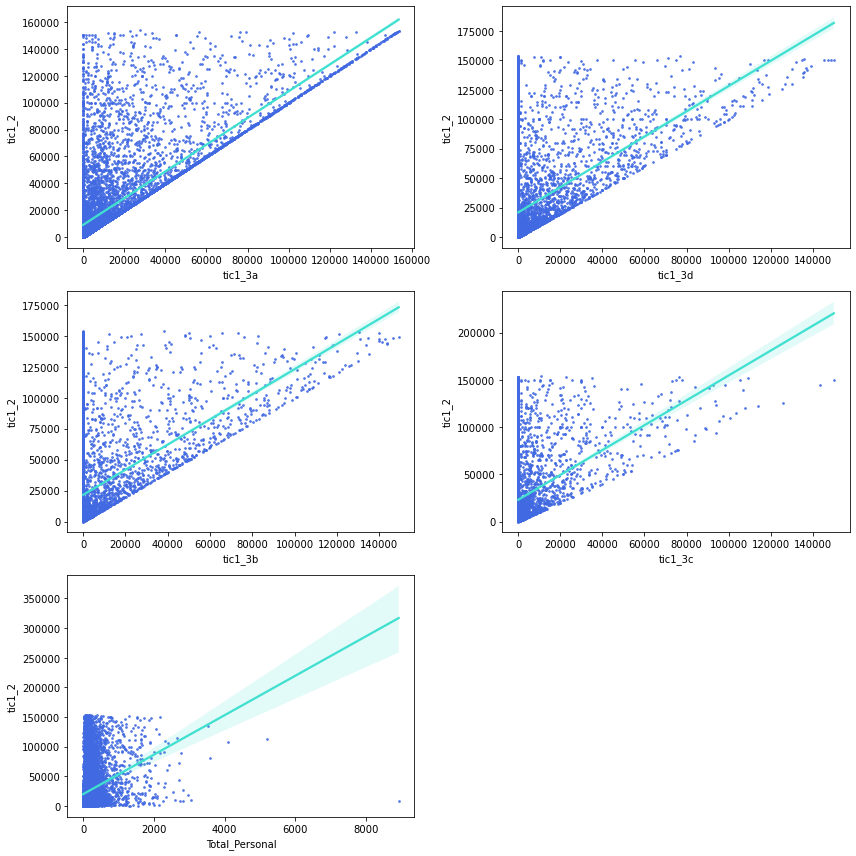

In [16]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = df.corr()
#
cols = corr.nlargest(6, "tic1_2")["tic1_2"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['tic1_2'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

In [17]:
log_tic1_2=np.log(df.tic1_2)
df['log_tic1_2']=log_tic1_2

C:\Users\Alejandro Reyes\AppData\Local\Temp\ipykernel_1888\1393511951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_tic1_2']=log_tic1_2


### Línea de tendencia calculada por Regresión lineal para observar que tanto se ajusta la recta a la nueva nube de puntos

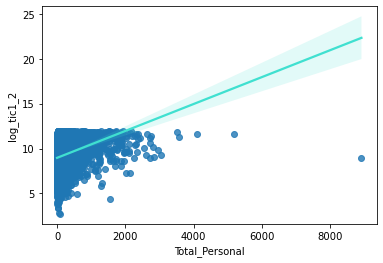

In [18]:
sns.regplot(y='log_tic1_2',
            x= 'Total_Personal',
            data=df, 
            line_kws={'color': 'turquoise'})
plt.show()

In [19]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [20]:
regresion = ols("log_tic1_2 ~ des_tamano + tic1_3a + tic1_3b + tic1_3c + tic1_3d + tic2_2_1a + tic2_2_1b + tic2_2_1c + tic2_3 + tic2_6a + \
                tic2_6b + tic2_6c + tic2_6d + tic2_6f + tic2_6g + tic2_6h + tic2_6i + tic2_6k + tic2_8 + tic2_8_2b + tic2_8_2c + tic3_1 + tic3_1_2b + \
                tic3_1_2c + tic3_1_2d + tic3_1_2e + tic3_1_2f + tic3_2 + tic4_1a + tic4_1b + tic4_1d + tic4_1e + tic4_2a + tic4_2b + tic4_2c + tic4_2d + \
                tic4_2e + tic4_4a + tic4_4b + tic4_4c + tic4_4d + tic4_4e + tic4_4f + tic4_4g + tic4_4h + tic5_1a + tic5_1b + tic5_1d + tic5_1f + tic5_1h + \
                tic6_1 + tic6_2a + tic6_2b + tic6_2c + Año + Total_Personal + Total_Espec", data=df)
results = regresion.fit()


In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_tic1_2   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     448.7
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:23   Log-Likelihood:                -15321.
No. Observations:               12032   AIC:                         3.076e+04
Df Residuals:                   11974   BIC:                         3.119e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         50.5116     10.529      4.

- ¿Bajo cuántos datos fue obtenido el modelo? cantidad de datos:  14029      
- ¿Cuál es su grado de ajuste?  68 % que es el porcentaje de variabilidad explicado por las X en nuestra variable dependiente Y.
- ¿Hay variables significativas? des_tamano, tic1_3a, tic1_3b, tic1_3c, tic1_3d, tic2_2_1a, tic2_2_1c, tic2_6b, tic2_6c...
- ¿Cuáles son las variables no significativas?

### Verificacion de Supuestos de Regresión Lineal

### 1. Multicolinearidad

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
df2=df[df.columns.difference(['tic1_2', 'log_tic1_2'])]
df2

,Año,Total_Espec,Total_Personal,des_tamano,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_2_1a,tic2_2_1b,...,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
0,2016,0,2,2,0,3481,0,0,2,2,...,2,1,1,2,2,2,2,2,2,1
1,2016,0,2,0,600,360,240,0,1,2,...,1,1,1,2,2,1,2,2,2,1
2,2016,0,8,2,4761,0,0,0,2,2,...,1,1,1,1,1,1,2,2,2,1
3,2016,0,1,2,31598,0,0,0,2,1,...,1,1,1,2,1,2,2,2,2,1
4,2016,0,3,1,101277,0,0,0,2,2,...,1,1,1,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,2021,0,3,0,0,33388,0,0,2,2,...,1,1,1,1,1,1,2,2,1,2
14025,2021,1,21,0,16359,10459,0,0,2,2,...,2,1,1,2,1,1,1,2,2,1
14026,2021,0,60,1,10506,0,0,0,2,2,...,2,1,1,2,1,2,2,2,2,1
14027,2021,0,22,0,196,1985,0,0,2,2,...,1,1,1,2,1,2,2,2,1,2


In [24]:
df2.dtypes

Año               int64
Total_Espec       int64
Total_Personal    int64
des_tamano        int64
tic1_3a           int64
tic1_3b           int64
tic1_3c           int64
tic1_3d           int64
tic2_2_1a         int64
tic2_2_1b         int64
tic2_2_1c         int64
tic2_3            int64
tic2_6a           int64
tic2_6b           int64
tic2_6c           int64
tic2_6d           int64
tic2_6f           int64
tic2_6g           int64
tic2_6h           int64
tic2_6i           int64
tic2_6k           int64
tic2_8            int64
tic2_8_2b         int64
tic2_8_2c         int64
tic3_1            int64
tic3_1_2b         int64
tic3_1_2c         int64
tic3_1_2d         int64
tic3_1_2e         int64
tic3_1_2f         int64
tic3_2            int64
tic4_1a           int64
tic4_1b           int64
tic4_1d           int64
tic4_1e           int64
tic4_2a           int64
tic4_2b           int64
tic4_2c           int64
tic4_2d           int64
tic4_2e           int64
tic4_4a           int64
tic4_4b         

Ahora si, calculemos el VIF de nuestras vaibales para ver que tan correlacionadas están entre sí:

In [25]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

           feature          VIF
0              Año  1253.655855
1      Total_Espec     1.128723
2   Total_Personal     2.000369
3       des_tamano     1.397613
4          tic1_3a     1.764947
5          tic1_3b     1.088410
6          tic1_3c     1.105463
7          tic1_3d     1.161136
8        tic2_2_1a    37.204714
9        tic2_2_1b    38.963116
10       tic2_2_1c    20.209711
11          tic2_3    10.142769
12         tic2_6a   811.916199
13         tic2_6b    11.335579
14         tic2_6c    11.083064
15         tic2_6d    13.619250
16         tic2_6f    41.988043
17         tic2_6g    13.828080
18         tic2_6h    12.147394
19         tic2_6i    16.373903
20         tic2_6k    13.456056
21          tic2_8    14.232701
22       tic2_8_2b    12.021968
23       tic2_8_2c    27.947037
24          tic3_1    22.412061
25       tic3_1_2b    22.887103
26       tic3_1_2c    22.571664
27       tic3_1_2d    26.189023
28       tic3_1_2e    49.660130
29       tic3_1_2f    46.011065
30      

In [26]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Año', 'tic2_6a'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Año', 'tic2_6a'])].values, i) \
                   
                   for i in range(len(df2[df2.columns.difference(['Año', 'tic2_6a'])].columns))]

print(vif_data)

           feature        VIF
0      Total_Espec   1.126260
1   Total_Personal   1.997675
2       des_tamano   1.396996
3          tic1_3a   1.747279
4          tic1_3b   1.082333
5          tic1_3c   1.101682
6          tic1_3d   1.158736
7        tic2_2_1a  33.292903
8        tic2_2_1b  34.467905
9        tic2_2_1c  17.599934
10          tic2_3  10.138095
11         tic2_6b  11.317166
12         tic2_6c  11.069796
13         tic2_6d  13.595093
14         tic2_6f  39.898131
15         tic2_6g  13.822797
16         tic2_6h  12.143084
17         tic2_6i  16.319357
18         tic2_6k  13.447530
19          tic2_8  14.214450
20       tic2_8_2b  11.922361
21       tic2_8_2c  27.833229
22          tic3_1  22.333140
23       tic3_1_2b  22.819911
24       tic3_1_2c  22.571543
25       tic3_1_2d  26.044119
26       tic3_1_2e  48.702844
27       tic3_1_2f  45.301889
28          tic3_2  16.752862
29         tic4_1a   1.951900
30         tic4_1b   1.429064
31         tic4_1d   1.355245
32        

In [27]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f'])].values, i) \
                   
                   for i in range(len(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f'])].columns))]

print(vif_data)

           feature        VIF
0      Total_Espec   1.126187
1   Total_Personal   1.996159
2       des_tamano   1.395849
3          tic1_3a   1.745599
4          tic1_3b   1.082326
5          tic1_3c   1.101640
6          tic1_3d   1.158445
7        tic2_2_1a  33.102794
8        tic2_2_1b  34.273517
9        tic2_2_1c  17.523289
10          tic2_3  10.134027
11         tic2_6b  11.313261
12         tic2_6c  11.069558
13         tic2_6d  13.594056
14         tic2_6f  39.757132
15         tic2_6g  13.822538
16         tic2_6h  12.133920
17         tic2_6i  16.289509
18         tic2_6k  13.446109
19          tic2_8  14.214383
20       tic2_8_2b  11.911592
21       tic2_8_2c  27.808620
22          tic3_1  22.322955
23       tic3_1_2b  21.730507
24       tic3_1_2c  21.603553
25       tic3_1_2d  23.329009
26          tic3_2  16.751855
27         tic4_1a   1.951115
28         tic4_1b   1.428558
29         tic4_1d   1.354873
30         tic4_1e   1.169302
31         tic4_2a  11.660948
32        

In [28]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b'])].values, i) \
                   
                   for i in range(len(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b'])].columns))]

print(vif_data)

           feature        VIF
0      Total_Espec   1.123773
1   Total_Personal   1.994097
2       des_tamano   1.392179
3          tic1_3a   1.730369
4          tic1_3b   1.077351
5          tic1_3c   1.095934
6          tic1_3d   1.155742
7        tic2_2_1c  13.637397
8           tic2_3   9.915633
9          tic2_6b  11.289432
10         tic2_6c  11.015707
11         tic2_6d  13.445522
12         tic2_6g  13.112457
13         tic2_6h  12.125485
14         tic2_6i  16.185074
15         tic2_6k  13.361472
16          tic2_8  14.105420
17       tic2_8_2b  11.665642
18       tic2_8_2c  27.503874
19          tic3_1  22.043727
20       tic3_1_2b  21.213280
21       tic3_1_2c  21.436561
22       tic3_1_2d  22.492714
23          tic3_2  16.637272
24         tic4_1a   1.944535
25         tic4_1b   1.427156
26         tic4_1d   1.350806
27         tic4_1e   1.167552
28         tic4_2a  11.601848
29         tic4_2c  10.275071
30         tic4_2d  15.254521
31         tic4_2e  13.813720
32        

In [29]:
regresion_2 = ols("log_tic1_2 ~ Total_Espec + Total_Personal + des_tamano + tic1_3a + tic1_3b + tic1_3c + tic1_3d + tic2_3 + tic4_1a + tic4_1b + tic4_1e + tic4_1d + tic6_2c + tic2_8_2c + tic3_1 + tic3_1_2b + tic3_1_2c + tic3_1_2d + tic5_1a + tic2_2_1c + tic2_6b + tic2_6c + tic2_6d + tic2_6g + tic2_6h + tic2_6i + tic2_6k + tic2_8 + tic2_8_2b + tic3_2 + tic4_2a + tic4_2c + tic4_2d + tic4_2e + tic4_4a + tic4_4b + tic4_4c + tic4_4d + tic4_4e + tic4_4f + tic4_4g + tic4_4h + tic5_1b + tic5_1d + tic5_1f + tic5_1h + tic6_1", data=df2)
results_2 = regresion_2.fit()

In [30]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_tic1_2   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     542.5
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:39   Log-Likelihood:                -15337.
No. Observations:               12032   AIC:                         3.077e+04
Df Residuals:                   11984   BIC:                         3.113e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.6929      0.103     93.

In [31]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a'])].values, i) \
                   
                   for i in range(len(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a'])].columns))]

print(vif_data)

           feature        VIF
0      Total_Espec   1.120997
1   Total_Personal   1.988827
2       des_tamano   1.387799
3          tic1_3a   1.717053
4          tic1_3b   1.076561
5          tic1_3c   1.093955
6          tic1_3d   1.149797
7        tic2_2_1c  13.475834
8           tic2_3   9.838793
9          tic2_6b  11.282245
10         tic2_6c  11.002842
11         tic2_6d  13.319342
12         tic2_6g  13.082445
13         tic2_6h  12.099883
14         tic2_6i  15.864376
15         tic2_6k  13.294801
16          tic2_8  12.532200
17       tic2_8_2b  10.345009
18          tic3_2  13.800400
19         tic4_1a   1.938974
20         tic4_1b   1.425939
21         tic4_1d   1.348030
22         tic4_1e   1.166722
23         tic4_2a  11.565736
24         tic4_2c  10.120331
25         tic4_2d  15.206417
26         tic4_2e  13.784069
27         tic4_4a  14.880632
28         tic4_4b  15.214337
29         tic4_4c  16.170378
30         tic4_4d  19.524418
31         tic4_4e  17.835262
32        

In [32]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a', 'tic2_2_1c', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6g', 'tic2_6h', 'tic2_6i', 'tic2_6k', 'tic2_8', 'tic2_8_2b', 'tic3_2', 'tic4_2a', 'tic4_2c', 'tic4_2d', 'tic4_2e', 'tic4_4a', 'tic4_4b', 'tic4_4c', 'tic4_4d', 'tic4_4e', 'tic4_4f', 'tic4_4g', 'tic4_4h', 'tic5_1b', 'tic5_1d', 'tic5_1f', 'tic5_1h', 'tic6_1'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a', 'tic2_2_1c', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6g', 'tic2_6h', 'tic2_6i', 'tic2_6k', 'tic2_8', 'tic2_8_2b', 'tic3_2', 'tic4_2a', 'tic4_2c', 'tic4_2d', 'tic4_2e', 'tic4_4a', 'tic4_4b', 'tic4_4c', 'tic4_4d', 'tic4_4e', 'tic4_4f', 'tic4_4g', 'tic4_4h', 'tic5_1b', 'tic5_1d', 'tic5_1f', 'tic5_1h', 'tic6_1'])].values, i) \
                   
                   for i in range(len(df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a', 'tic2_2_1c', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6g', 'tic2_6h', 'tic2_6i', 'tic2_6k', 'tic2_8', 'tic2_8_2b', 'tic3_2', 'tic4_2a', 'tic4_2c', 'tic4_2d', 'tic4_2e', 'tic4_4a', 'tic4_4b', 'tic4_4c', 'tic4_4d', 'tic4_4e', 'tic4_4f', 'tic4_4g', 'tic4_4h', 'tic5_1b', 'tic5_1d', 'tic5_1f', 'tic5_1h', 'tic6_1'])].columns))]

print(vif_data)

           feature       VIF
0      Total_Espec  1.096524
1   Total_Personal  1.939523
2       des_tamano  1.299221
3          tic1_3a  1.672933
4          tic1_3b  1.071535
5          tic1_3c  1.089022
6          tic1_3d  1.126067
7           tic2_3  4.853141
8          tic4_1a  1.874848
9          tic4_1b  1.414060
10         tic4_1d  1.331510
11         tic4_1e  1.159081
12         tic6_2c  5.451806


In [33]:
regresion_3 = ols("log_tic1_2 ~ Total_Espec + Total_Personal + des_tamano + tic1_3a + tic1_3b + tic1_3c + tic1_3d + tic2_3 + tic4_1a + tic4_1b + tic4_1e + tic4_1d + tic6_2c", data=df2)
results_3 = regresion_3.fit()

In [34]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_tic1_2   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1788.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:41   Log-Likelihood:                -15721.
No. Observations:               12032   AIC:                         3.147e+04
Df Residuals:                   12018   BIC:                         3.157e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.2874      0.036    230.

### 2. Linealidad en los Parámetros

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


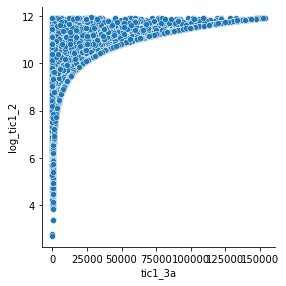

In [35]:
sns.pairplot(x_vars='tic1_3a', y_vars='log_tic1_2', data=df, size=4)

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


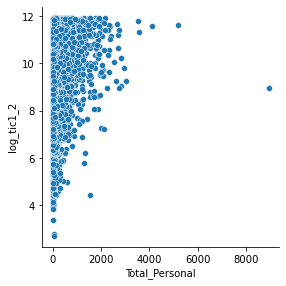

In [36]:
sns.pairplot(x_vars='Total_Personal', y_vars='log_tic1_2' , data=df, size=4)

### 3. Normalidad de residuos

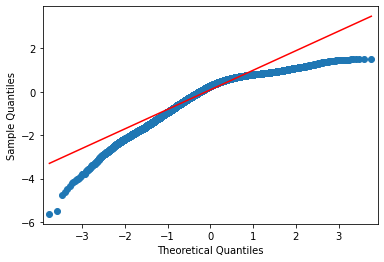

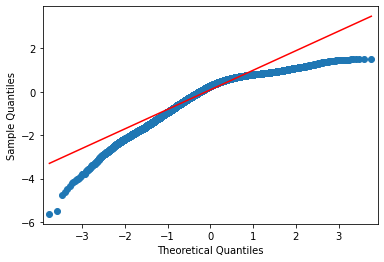

In [37]:
sm.qqplot(results_3.resid, line='q')

### Prueba de Jarque-Bera

In [38]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [39]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_3.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 3469.927918690394),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -1.1536470698112171),
 ('Kurtosis', 4.2640381826699185)]

In [40]:
results_3.resid.mean()

3.3544532400014155e-14

### 4. Homocedasticidad en los residuos

In [41]:
y_pred=results_3.predict()

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gráfica de residuos')

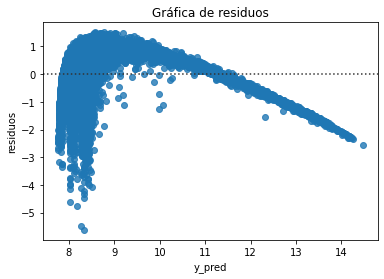

In [42]:
sns.residplot(y_pred, results_3.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

In [43]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_3.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 322.14049930324654),
 ('p-value', 1.1561823044799806e-38),
 ('f-value', 5.77907114944322),
 ('f p-value', 2.6305923115893935e-39)]

In [44]:
df3=df2[df2.columns.difference(['Año', 'tic2_6a', 'tic3_1_2e', 'tic3_1_2f', 'tic2_2_1a', 'tic2_2_1b', 'tic2_6f', 'tic4_2b', 'tic6_2a', 'tic6_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b', 'tic3_1_2c', 'tic3_1_2d', 'tic5_1a', 'tic2_2_1c', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6g', 'tic2_6h', 'tic2_6i', 'tic2_6k', 'tic2_8', 'tic2_8_2b', 'tic3_2', 'tic4_2a', 'tic4_2c', 'tic4_2d', 'tic4_2e', 'tic4_4a', 'tic4_4b', 'tic4_4c', 'tic4_4d', 'tic4_4e', 'tic4_4f', 'tic4_4g', 'tic4_4h', 'tic5_1b', 'tic5_1d', 'tic5_1f', 'tic5_1h', 'tic6_1'])]
# df3['intercepto']=1
df3

,Total_Espec,Total_Personal,des_tamano,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_3,tic4_1a,tic4_1b,tic4_1d,tic4_1e,tic6_2c
0,0,2,2,0,3481,0,0,1,4,0,0,0,1
1,0,2,0,600,360,240,0,2,4,0,1,1,1
2,0,8,2,4761,0,0,0,2,7,1,7,0,1
3,0,1,2,31598,0,0,0,2,1,0,0,0,1
4,0,3,1,101277,0,0,0,2,36,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,3,0,0,33388,0,0,1,3,4,6,0,2
14025,1,21,0,16359,10459,0,0,1,0,21,0,0,1
14026,0,60,1,10506,0,0,0,2,28,2,0,0,1
14027,0,22,0,196,1985,0,0,1,3,2,1,1,2


In [45]:
results_3.predict()

array([7.92835589, 8.31035221, 7.93841732, ..., 8.41793887, 8.49148718,
       7.84884359])

In [46]:
y_pred=results_3.predict(df3)
y_pred

0         7.928356
1         8.310352
2         7.938417
3         8.933679
4        11.804686
           ...    
14024     9.519309
14025     9.280977
14026     8.417939
14027     8.491487
14028     7.848844
Length: 12032, dtype: float64

In [47]:
df.log_tic1_2

0         8.155075
1         7.090077
2         8.468213
3        10.360849
4        11.525615
           ...    
14024    10.415952
14025    10.196866
14026     9.259702
14027     7.687997
14028     7.753624
Name: log_tic1_2, Length: 12032, dtype: float64

### Medición de errores

In [53]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 1:]  # Selecciona todas las filas y todas las columnas a partir de la columna índice 1 hasta la última
y = df.iloc[:, 0]   # Selecciona todas las filas y la primera columna

In [54]:
l_reg = LinearRegression().fit(X, y)

In [55]:
l_reg.coef_

array([ 2.91076382e-02, -2.91069984e-02, -2.91068004e-02, -2.91070994e-02,
       -2.91064458e-02, -7.53596459e-04, -6.73143637e-02,  1.13095664e-02,
        2.71582334e-02, -5.84765518e-02,  3.76456995e-02, -1.82710504e-02,
        7.60688986e-03,  8.31247795e-02,  8.70977680e-03, -5.01949021e-02,
       -5.39449059e-02, -1.63708330e-02, -3.48905981e-02,  1.50376624e-02,
       -2.21921438e-02,  3.22138730e-02,  1.22925621e-02,  3.04983535e-02,
        3.05510427e-02, -3.27017455e-02,  5.08462391e-02, -2.15054132e-02,
        1.08399159e-04, -2.41090378e-04, -1.97215995e-04, -5.43325374e-04,
        3.97738349e-02, -3.17263937e-02, -2.34373668e-02, -1.01640078e-02,
        2.57435370e-02, -3.65898921e-02,  8.36560284e-02,  1.31516891e-01,
       -8.17153389e-02, -1.31708653e-02,  6.81584007e-02,  3.08354270e-02,
       -6.53434237e-02, -5.76943945e-03,  6.20888499e-02, -8.48099126e-03,
       -4.99662415e-02,  3.22627031e-02,  1.31832163e-02, -2.73805548e-02,
       -4.20985579e-02, -

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Ajustar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X, y)

# Realizar las predicciones
y_pred = regression_model.predict(X)

# Calcular el MAE
mae = mean_absolute_error(y, y_pred)
print("MAE:", mae)

MAE: 0.4022097389985913


In [58]:
mae = np.abs(y - y_model).mean()
print

<function print>

In [56]:
# MSE: mean squared error, MAE: mean absoulte error, RMSE: Root mean square error
y_model = l_reg.predict(X)

((y - y_model)**2).mean(), (np.abs(y - y_model)).mean(), np.sqrt(((y - y_model)**2).mean())

(0.289999402449094, 0.40220973899859247, 0.5385159259010768)

In [18]:
# -------------------------------------------------------------

In [20]:
ae = abs(df.tic1_2 - y_pred)

ValueError: operands could not be broadcast together with shapes (14029,) (14029,56) 

## ------------------------------ ES HASTA AQUÍ --------------------------

### Esto que sigue, ya no es:

    Es de otro ejercicio

In [ ]:
results_2.predict({'Especialistas_Tic':0 , 'Hardware_Laptop': 0 , 'Hardware_Pc':0 , 'Hardware_smatphone':0 , 
                   'Hardware_tablet': 0 , 'Inv_Tic_Bienes': 0 , 'Total_Personal': 0, 'des_tamano': 0})

In [ ]:
# Valores predecidos en azul
sns.regplot(x=df["Hardware_Pc"], y=y_pred, scatter_kws={"color": "blue", "s": 3},
                line_kws={"color": "blue"})
# Valores observados en color violeta
sns.regplot(x=df["Hardware_Pc"], y=df['log_Inversion_Tic'], scatter_kws={"color": "violet", "s": 3},
                line_kws={"color": "violet"})


In [ ]:
# Valores predecidos en azul
sns.regplot(x=df["Especialistas_Tic"], y=y_pred, scatter_kws={"color": "blue", "s": 3},
                line_kws={"color": "blue"})
# Valores observados en color violeta
sns.regplot(x=df["Especialistas_Tic"], y=df['log_Inversion_Tic'], scatter_kws={"color": "violet", "s": 3},
                line_kws={"color": "violet"})

In [ ]:
# Valores predecidos en azul
sns.regplot(x=df["Hardware_Laptop"], y=y_pred, scatter_kws={"color": "blue", "s": 3},
                line_kws={"color": "blue"})
# Valores observados en color violeta
sns.regplot(x=df["Hardware_Laptop"], y=df['log_Inversion_Tic'], scatter_kws={"color": "violet", "s": 3},
                line_kws={"color": "violet"})

In [ ]:
# Valores predecidos en azul
sns.regplot(x=df["des_tamano"], y=y_pred, scatter_kws={"color": "blue", "s": 3},
                line_kws={"color": "blue"})


In [ ]:
# Valores observados en color violeta
sns.regplot(x=df["des_tamano"], y=df['log_Inversion_Tic'], scatter_kws={"color": "violet", "s": 3},
                line_kws={"color": "violet"})

In [ ]:
np.sqrt(((np.exp(y_pred)-np.exp(df['log_Inversion_Tic']))**2).mean())

El error cambia debido al cambio de variables escogidas mediante el vif

#### Para evaluar la calidad de la predicción

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(df.log_Inversion_Tic, y_pred)

In [ ]:
r2 = r2_score(df.log_Inversion_Tic, y_pred)

In [ ]:
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

#### Para obtener una evaluación más precisa de la calidad de la predicció

In [ ]:
ae = abs(df.log_Inversion_Tic - y_pred)

In [ ]:
ape = abs(df.log_Inversion_Tic - y_pred) / df.log_Inversion_Tic * 100


In [ ]:
mape = ape.mean()

In [ ]:
maxape = ape.max()

In [ ]:
print("Error absoluto medio (AE):", ae.mean())
print("Porcentaje de error absoluto medio (MAPE):", mape)
print("Porcentaje de error máximo absoluto (MaxAPE):", maxape)


    - las predicciones del modelo difieren en 1.0677 unidades del valor real.
    - las predicciones del modelo tienen un error del 12.53% en relación con los valores reales
    - en algunos casos las predicciones del modelo pueden estar muy alejadas de los valores reales, con un error porcentual máximo del 229.60%.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('log_Inversion_Tic', axis=1), df['log_Inversion_Tic'], test_size=0.2, random_state=42)

# Crear el modelo de regresión ridge
ridge_model = Ridge(alpha=1.0)

# Entrenar el modelo
ridge_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Calcular el MAPE
mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))

# Imprimir el MAPE
print("MAPE:", mape)


In [ ]:
maxape = ape.max()

In [ ]:
print("Error absoluto medio (AE):", ae.mean())
print("Porcentaje de error absoluto medio (MAPE):", mape)
print("Porcentaje de error máximo absoluto (MaxAPE):", maxape)

 un AE y un MAPE bajos indican que el modelo tiene un buen rendimiento en términos de precisión de predicción. Sin embargo, el alto valor de MaxAPE sugiere que el modelo puede tener dificultades para predecir correctamente algunos casos extremos, lo que podría afectar la confiabilidad de las predicciones en esos casos.